# 22 Regression
File(s) needed: Employee.csv

데이터를 설명하거나 미래 결과를 예측하기 위해 데이터로 부터 모델을 만듭니다. 모델링할 데이터가 선형 관계를 나타내는 것처럼 보이면, 그 관계를 설명하기 위해 linear model(선형 모델)을 사용합니다. 선형 모델의 개념은 간단합니다.

- Data 를 가장 잘 설명하는 직선을 찾는것.

이미 이전에 plotting 파트에서 회귀직선을 포함하는 scatterplot 에서 그 부분을 확인했었습니다. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')


fig = sns.lmplot(x='total_bill',y='tip',data=tips)


/Users/eastone/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


# Simple linear regression
  
  
회귀 직선을 나타내는 법은 알았으나, 이 회귀 직선이 무엇을 의미하고 어떤 방정식에 의해 그려졌는지 알아볼 필요가 있습니다. 회귀식을 알 수 있다면 total bill에 대한 예상 tip을 알 수 있는 것처럼, 수치를 대입하여 새로운 변수값을 예측할 수 있습니다.



회귀 식은 보통 다음과 같습니다.

\begin{equation*}
y = mx + b
\end{equation*}


<ul style="list-style-type:none;">
    <li><i><b>y</i></b> 는 우리가 예측하고자 하는 값입니다. (종속변수 혹은 반응변수라고도 합니다),</li>
    <li><i><b>x</i></b> 는 예측을 위해 사용하는 값입니다. (독립변수, 설명변수, 예측변수 라고도 합니다.),</li>
<li><i><b>m</i></b>은 선의 기울기를 의미합니다.</li>
<li><i><b>b</i></b> 는 y 절편을 의미합니다.</li>
</ul>

## Linear regression with statsmodels

위에서 봤던 plot으로 회귀선이 어떻게 생겼는지 알 수 있으므로, "tips" 데이터를 사용하여 선형 회귀 모형을 만들어 봅시다. `statsmodels` 라이브러리에 있는 `formula` API를 사용하겠습니다.


https://www.statsmodels.org/dev/regression.html

In [2]:
# import formula API from statsmodel 
import statsmodels.formula.api as smf


In [3]:
# tips데이터가 어떤 모습을 하고 있는지 head메소드로 봅시다
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


단순 선형 회귀분석(simple linear regression)을 위해 statsmodels.formula library에 있는 `ols` function을 사용합니다. Ordinary least squares(OLS), 최소 자승법은 선형 회귀 모델에서 모르는 파라미터를 추정하는 방법입니다. OLS는 설명 변수(x)들의 선형 함수의 파라미터들을 최소 제곱의 원리에 따라 선택합니다. 즉, 관측된 종속변수(y)들과 선형 함수를 통해 예측된 값들 차(잔차)의 제곱의 합을 최소화 하는 것이라고 보면 되겠습니다.

쉽게 말하자면, 


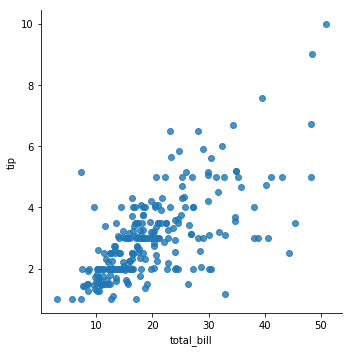

In [4]:
fig = sns.lmplot(x='total_bill',y='tip',data=tips,fit_reg= False)

위 산포도에서 임의의 선을 하나 그어봅시다. 그 다음 각 점들과 임의의 선 사이의 거리를 일일히 구합니다. 어떤 점은 선과의 거리가 가까울 수도 있고 어떤 점은 멀리에 있을 수도 있습니다.

이 거리의 총길이를 구할 건데, 거리를 구하면 +값이 나올수도 있고 -가 나올 수도 있기 때문에 모두 합했을 때 길이가 제대로 나오지 않습니다. 

따라서 각 점들과의 거리에 *제곱*을 합니다. 위 방법으로 구해진 총길이가 가장 최소가 나오는 임의의 선을 구합니다. 각 점들과 선(예측값)사이의 거리를 **잔차(residual)** 라고 하며, 이것이 **_최소자승법(ols)_** 이며 회귀식을 구하는 방법입니다.

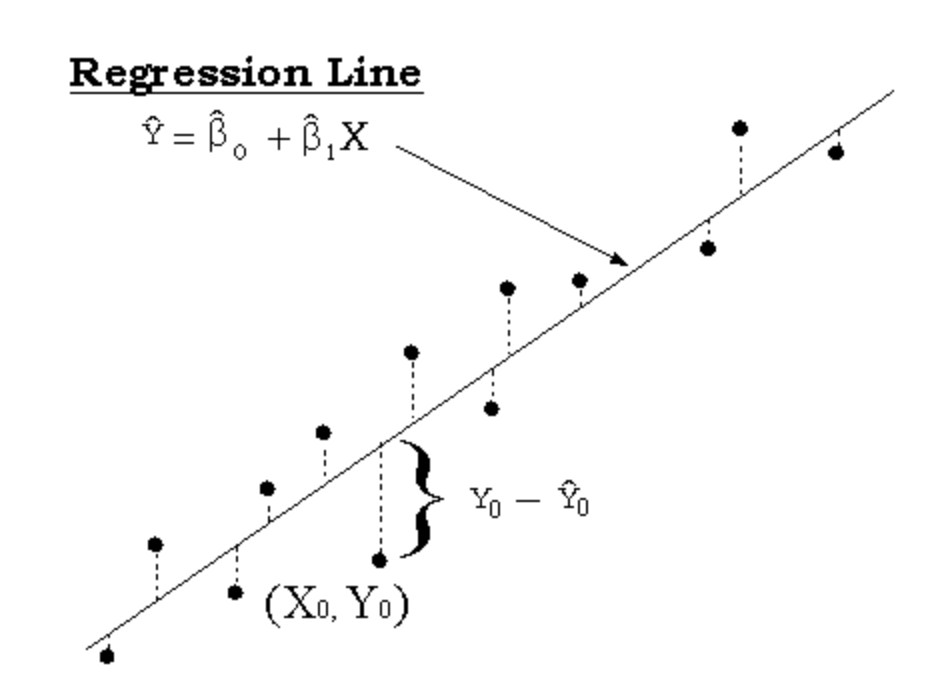

In [8]:
# OLS를 사용하여 회귀분석 모델을 생성합니다.
model = smf.ols(formula = 'tip ~ total_bill', data = tips)
results = model.fit()

In [9]:
# 위에서 구한 OLS regression의 결과값을 프린트해줍시다
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 12 May 2020   Prob (F-statistic):           6.69e-34
Time:                        18:39:51   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

위 결과를 어떻게 해석하면 될까요?? 계수값(coef)을 이용하여 식을 세워서 total_bill(x)로 tip(y)값을 구할 수 있습니다.

\begin{equation*}
y = 0.1050x + 0.9203
\end{equation*}

위 식에 의하면 total_bill 즉 총 가격이 1불이 증가할때마다 팁이 0.105불씩 증가하는 것을 알 수 있습니다! 즉 10.5% 정도의 팁을 내는 가게인 셈이죠! 



print를 통해 전체 결과값을 출력하는 방법도 있지만, 또 다른 옵션이 몇가지 있습니다. `params` 어트리뷰트를 이용하여 계수만 얻을 수 있고`conf_int()` method를 통해 신뢰구간을 구할 수도 있습니다.

### 회귀분석의 결과 해석 순서

1. 결정계수 확인  
2. 모형의 적합도 확인
3. 회귀계수확인  
4. t값과 t값의 유의확률 확인

### 회귀분석 결과 해석

**R-squared(R제곱)** 값은 결정계수라는 이름으로도 불립니다. 분석한 회귀분석모델이 얼마나 데이터프레임을 잘 설명해주는지를 의미하는 계수입니다. 0부터 1까지의 값을 가지며 R-Squared가 1이면 독립변수(X)를 통해 종속변수(Y)를 완벽하게 예측할 수 있다는 것을 의미합니다. 하지만 일반적으로 사회과학에서는 보통 0.4 이상이면 괜찮은 모델이라고 봅니다. 결정 계수가 0.4 면 X 변수로 부터 40%확률로 Y 값을 예측할 수 있다 라는 의미로 보면 됩니다. 

**Adjusted R-squared** , 조정된 결정계수라는 이름을 가진 이 값은 독립 변수가 한개 이상인 다중 회귀분석에서 유의미한 수치입니다. 독립변수가 2개 이상 들어가는 회귀분석은 결정계수가 독립변수의 수에 따라 값이 올라가는 특셩이 있습니다. 이를 보완한 것이 이 조정된 결정계수입니다.

**P>|t|(P-value)** 는 독립변수가 유의미한 확률을 의미합니다. 정확히는 귀무가설을 기각하는 확률인데, 쉽게 말하자면 P-value 가 0.05라면 5% 확률로 이 변수가 종속변수에 영향을 미치는 것이 무의미하다 라는 뜻입니다. 즉 95% 확률로 이 변수가 종속변수에 유의미한 영향을 미친다고 해석할 수 있습니다. 보통 95% 의 신뢰도를 가져야 유의미하다고 판단하기 때문에 P-value가 0.05보다 작으면 분석에 있어서 유의미한 변수다 라고 판단합니다.

**Durbin-Watson(더빈 왓슨, DW검정)** 은 잔차의 독립성을 확인할 수 있는 수치입니다. 잔차들이 상관관계가 없어야 유의미한 회귀분석이 되기 때문에 양의 상관관계를 갖는 0보다 커야하고 음의상관관계를 갖는 4보다 작아야합니다. 보통 1.5~ 2.5 사이이면 독립으로 판단하여 회귀모형이 적합하다고 봅니다.

**No.observations** 는 몇 개의 데이터 쌍으로 회귀분석을 실시했는지를 알려줍니다. 위의 예시에서는 244개의 데이터쌍이 사용되었습니다.

**Df Model** 회귀분석의 "예측변수(X)의 숫자"를 의미합니다. 종속변수를 제외하고 위 회귀분석 모델에서는 1개의 예측변수(독립변수)가 사용되었습니다.

**Df Residuals**는 _"No.observations - (Df Model + 1)"_ 로 산출합니다. 즉 전체 관찰데이터의 수에서 회귀모형의 전체 파라미터의 수를 뺀 값입니다. 


https://jihongl.github.io/2017/09/16/Rsquared/

https://dbrang.tistory.com/1102

https://no17.tistory.com/195

https://kiyoja07.blogspot.com/2019/03/python-linear-regression.html

회귀분석표에 대한 추가 설명

### 회귀분석의 적합성 
회귀분석결과 도출된 회귀식이 유의하지 않다면 해석을 하는 의미가 없을 것입니다. 따라서, 우리는 도출된 회귀식이 통계적으로 유의한지 확인해야합니다. 회귀식의 적합성 여부를 검정하기 위해 분산분석표를 이용합니다. F값은 회귀방정식에 의한 제곱평균과 잔차의 제곱평균의 비율을 말합니다. 이 비율이 크면 회귀식이 두 변수의 관계를 설명하는데 유의하다는 의미입니다. 따라서, F값과 유의확률을 보고 회귀분석의 적합성을 판단하면 됩니다.



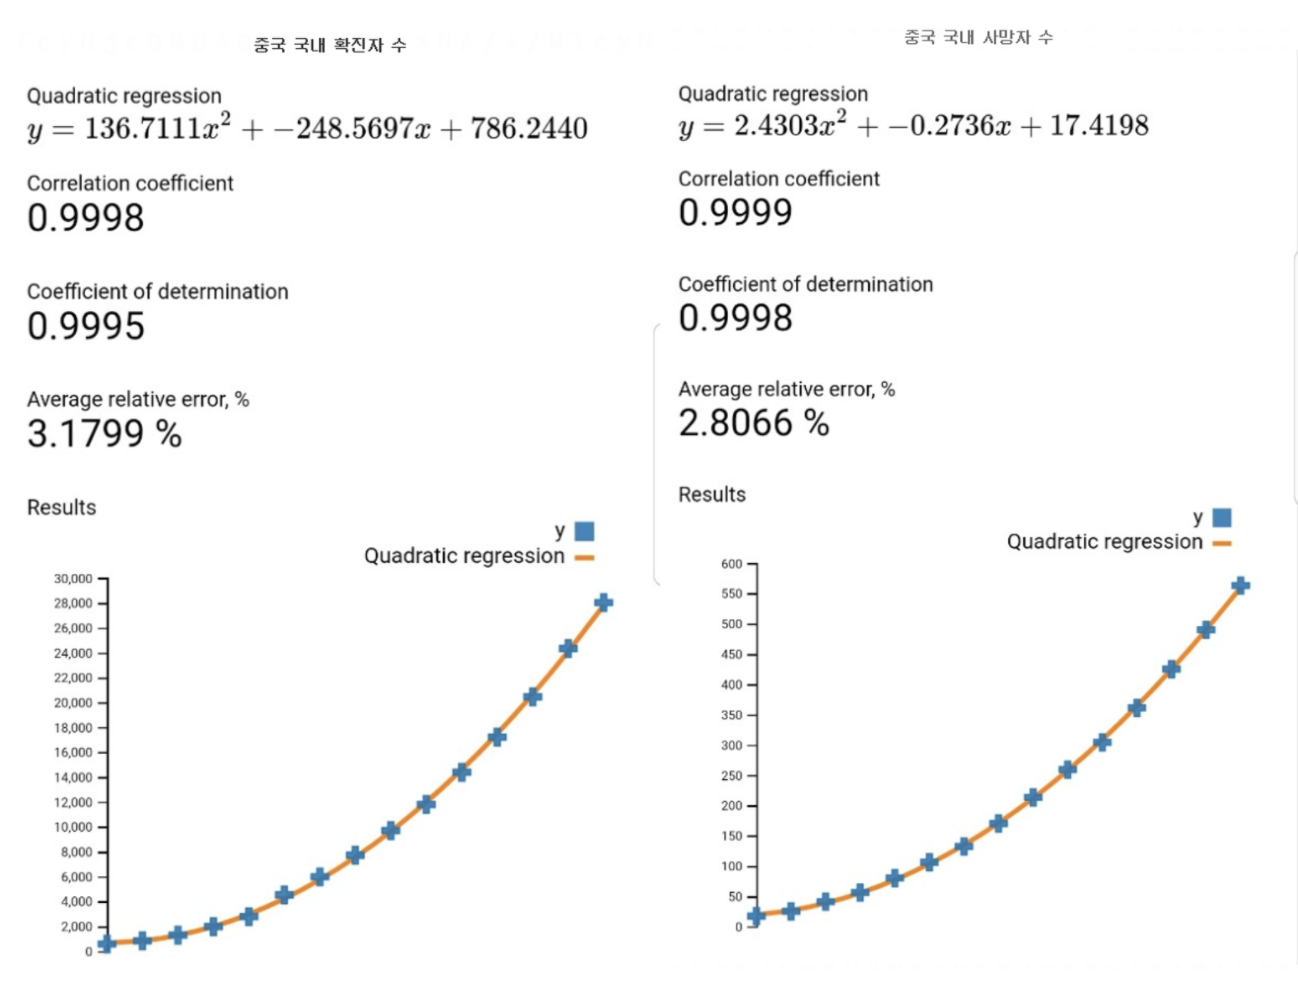

위에서 잠깐 배운 R-squared를 사용하여 위 분석을 해석해볼까요??

위 분석은 서울대 학생이 올해 2월 중국 코로나 발발했을 당시 실시했던 회귀분석입니다. 결정계수값이 0.99에 가까운 값을 보이고 있습니다. 즉 x값이 들어가면 y값이 거의 100퍼센트로 설명된다는 거죠. 사회 과학에서는 이러한 현상이 절대 나타날 수 없습니다!

In [9]:
#params attribute를 사용하여 계수(coefficients)를 구해봅시다.
print(results.params)

Intercept     0.920270
total_bill    0.105025
dtype: float64


In [10]:
#conf_int method를 사용하여 신뢰구간(confidence interval)을 구해봅시다.

print(results.conf_int())

                   0         1
Intercept   0.605622  1.234918
total_bill  0.090517  0.119532


신뢰구간에 대해 간단히 설명하자면, 예를 들어 전교생이 5천명인 학교에 있는 학생들의 키를 알고싶을때, 5천명을 모두 검사하기에는 시간이 오래 걸리므로 100명을 샘플로 사용합니다. 100명의 평균 키가 160이라면 '이 학교의 평균 키는 160이다' 라고 말하는 것보다 이 학교의 평균 키는 152 ~ 164 사이이다 라고 말하는 것이 더 합리적일 수 있습니다. 이를 신뢰 구간이라고 하며, 보통의 연구에서는 95%의 신뢰구간을 이용합니다. 

위 결과에 대한 해석을 하자면, 2.5%에 있는 값과 97.5%에 있는 값을 의미합니다. 즉 0.605은 앞 2.5% 에 해당하는 값이고, 1.234918는 97.5%에 있는 값을 의미합니다.

## Linear regression with sklearn
**scikit-learn**은 파이썬에서 머신러닝을 위해 만들어진 라이브러리입니다. 이 라이브러리에는 NumPy, SciPy, matplotlib등의 라이브러리가 내장되어 있습니다. `sklearn`라는 이름으로 라이브러리를 import해보겠습니다.

https://scikit-learn.org/stable/index.html


#### Why scikit-learn? 
  
 
 
   
CIO.com에서 인용한 기사입니다:

> Scikit은 파이썬 베이스의 과학적 컴퓨팅을 위한 라이브러리인 SciPy를 중심으로 만들어진 툴입니다. Scikit-learn은 scope creep을 피하고 입증되지 않은 알고리즘을 위한 머신러닝 기반의 오픈소스 프로젝트입니다. 또한, solid 알고리즘에 뛰어난 성능을 보이며 내부 루프처럼 속도가 빠를 필요가 있는 기능에는 Cython (the Python to C compiler)을 사용한다.
>
> Scikit-learn은 내가 테스트했던 모든 머신러닝 프레임 워크 중에서 가장 높은 점수를 준다. 알고리즘은 문서화된 대로 잘 작동하며, API는 일관되고 잘 설계되었고, 데이터 구조간 “impedance mismatches”가 없었다. 
><p style="text-align:right;font-size:80%">from https://www.cio.com/article/3213189/10-hot-data-analytics-trends-and-5-going-cold.html</p>



In [10]:
from sklearn import linear_model

In [11]:
# linear regression object를 생성합니다
lr = linear_model.LinearRegression()

In [12]:
# Specify the predictor (X) and response (y) variables
predicted = lr.fit(X=tips['total_bill'],y=tips['tip'])

ValueError: Expected 2D array, got 1D array instead:
array=[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.51 24.52 20.76 31.71
 10.59 10.63 50.81 15.81  7.25 31.85 16.82 32.9  17.89 14.48  9.6  34.63
 34.65 23.33 45.35 23.17 40.55 20.69 20.9  30.46 18.15 23.1  15.69 19.81
 28.44 15.48 16.58  7.56 10.34 43.11 13.   13.51 18.71 12.74 13.   16.4
 20.53 16.47 26.59 38.73 24.27 12.76 30.06 25.89 48.33 13.27 28.17 12.9
 28.15 11.59  7.74 30.14 12.16 13.42  8.58 15.98 13.42 16.27 10.09 20.45
 13.28 22.12 24.01 15.69 11.61 10.77 15.53 10.07 12.6  32.83 35.83 29.03
 27.18 22.67 17.82 18.78].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

에러가 나도 당황하지마세요! 이 버전은 선형회귀모델이 구축되는 방식 때문에 에러가 발생됩니다. 이 회귀모델은 _다중_ 선형회귀모델이 기본 설정으로 되어있기 때문에 변수로 list를 받기 때문입니다. 우리가 위에서 하나의 변수만을 넣어주었기 때문에 (-1, 1) 형태로 데이터를 다시 만들어주어야 합니다.


어떻게 바꿔주는지 알아보도록 합시다!

In [14]:
# reshape해주기 전에 컬럼을 확인해 봅시다
tips['total_bill'].values

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
       18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
       26.86, 25.28, 14.73, 10.51, 17.92, 27.2 , 22.76, 17.29, 19.44,
       16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16,
       28.97, 22.49,  5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01,
       12.46, 11.35, 15.38, 44.3 , 22.42, 20.92, 15.36, 20.49, 25.21,
       18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31, 29.93,
       10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8 ,
        8.52, 14.52,

In [13]:
# 그 후 (-1,1) 모양으로 reshape해줍시다
tips['total_bill'].values.reshape(-1,1)

array([[16.99],
       [10.34],
       [21.01],
       [23.68],
       [24.59],
       [25.29],
       [ 8.77],
       [26.88],
       [15.04],
       [14.78],
       [10.27],
       [35.26],
       [15.42],
       [18.43],
       [14.83],
       [21.58],
       [10.33],
       [16.29],
       [16.97],
       [20.65],
       [17.92],
       [20.29],
       [15.77],
       [39.42],
       [19.82],
       [17.81],
       [13.37],
       [12.69],
       [21.7 ],
       [19.65],
       [ 9.55],
       [18.35],
       [15.06],
       [20.69],
       [17.78],
       [24.06],
       [16.31],
       [16.93],
       [18.69],
       [31.27],
       [16.04],
       [17.46],
       [13.94],
       [ 9.68],
       [30.4 ],
       [18.29],
       [22.23],
       [32.4 ],
       [28.55],
       [18.04],
       [12.54],
       [10.29],
       [34.81],
       [ 9.94],
       [25.56],
       [19.49],
       [38.01],
       [26.41],
       [11.24],
       [48.27],
       [20.29],
       [13.81],
       [

In [14]:
# reshape 구문을 추가하여 다시 실행해봅시다
predicted = lr.fit(X=tips['total_bill'].values.reshape(-1,1),y=tips['tip'])

In [15]:
# sklearn를 사용하여 생성한 회귀모델을 확인해봅시다.
#coef는 계수, intercept는 절편입니다
print(predicted.coef_)
print(predicted.intercept_)


[0.10502452]
0.9202696135546731


# Exercise: simple linear regression
'Employee.csv'파일을 이용하여 'salbegin'으로 'salary'를 예측하는 단순 선형 회귀모델을 만들어보세요. 첫번째 셀에서는 statsmodels을 사용하여 코드를 작성해보시고 두번째 셀에서는 sklearn을 사용하여 코드를 작성해보세요.

Note: 'id'컬럼은 index 컬럼으로 하여 csv파일을 리드해보세요!

In [17]:
emp = pd.read_csv('../data/Employee.csv', index_col='id')
emp.head()

,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority,custodial,manager
id,,,,,,,,,,,
1,Male,1.165415e+10,15,Manager,57000.0,27000,98,144,No,0,1
2,Male,1.185296e+10,16,NaN,40200.0,18750,98,36,No,0,0
3,Female,1.094334e+10,12,NaN,21450.0,12000,98,381,No,0,0
4,Female,1.150252e+10,8,NaN,21900.0,13200,98,190,No,0,0
5,Male,1.174936e+10,15,NaN,45000.0,21000,98,138,No,0,0


In [19]:
# Simple regression using statsmodels
model = smf.ols(formula = 'salary ~ salbegin', data = emp)
results = model.fit()
print(results.summary())
print(results.params)
print(results.conf_int())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1622.
Date:                Tue, 12 May 2020   Prob (F-statistic):          8.20e-155
Time:                        18:46:46   Log-Likelihood:                -4938.3
No. Observations:                 474   AIC:                             9881.
Df Residuals:                     472   BIC:                             9889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1928.2058    888.680      2.170      0.0

# y = 1.9094x + 1928.2058

In [20]:
# Simple regression using sklearn
predicted = lr.fit(X=emp['salbegin'].values.reshape(-1,1),y=emp['salary'])
print(predicted.coef_)
print(predicted.intercept_)


[1.90944973]
1928.2057573545462


/Users/eastone/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


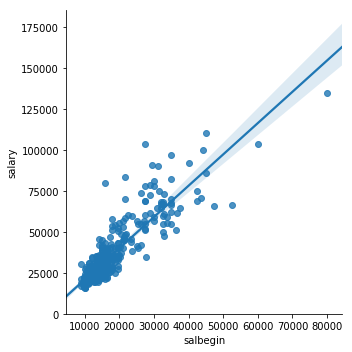

In [21]:
sns.lmplot(x = 'salbegin', y = 'salary', data = emp)
plt.show()

# Multiple Regression

우리가 이전에 학습했던 단순회귀분석의 경우는 하나의 예측변수(X)에 대한 반응변수(Y)의 회귀분석이었다면, 이번에 볼 _다중회귀분석(Multiple Regression)_ 은 둘 이상의 예측변수(X)에 대한 반응변수(Y)의 회귀분석입니다. 



다중회귀분석의 경우 회귀방정식은 다음과 같습니다 :

\begin{equation*}
y = m_1x_1 + m_2x_2 + ... + m_ix_i + b
\end{equation*}


<ul style="list-style-type:none;">
    <li><i><b>y</i></b> 는 우리가 예측하고자 하는 값입니다. (종속변수 혹은 반응변수라고도 합니다),</li>
    <li><i><b>x</i></b> 는 예측을 위해 사용하는 값입니다.(독립변수, 설명변수, 예측변수 라고도 합니다.) 여러개의 독립변수는 x<sub>1</sub> 부터 x<sub>i</sub> 같은 방식으로 표시됩니다
<li><i><b>m</i></b>은 회귀분석에서 coefficeint 값입니다. 계수는 m<sub>1</sub> 부터 m<sub>i</sub> 같은 방식으로 표시됩니다. </li>
<li><i><b>b</i></b> 는 y 절편을 의미합니다.</li>
</ul>



## Multiple regression using statsmodel
다중회귀모델을 데이터에 적용시키는 코드는 단순회귀분석과 동일하며, **+** 를 사용하여 예측 변수를 추가합니다..

이전에 우리가 했던 코드는 다음과 같습니다.

```
model = smf.ols(formula='tip ~ total_bill', data=tips)
```

위 모델에 `size` 변수를 예측 변수로서 추가하겠습니다.

In [21]:
# size를 예측변수로 추가하기
model = smf.ols(formula = 'tip ~ total_bill + size', data= tips)
result = model.fit()



print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 12 May 2020   Prob (F-statistic):           9.67e-34
Time:                        18:49:49   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0

예측 변수 두개를 사용해서, 다음과 같은 방정식을 만들 수 있습니다:

\begin{equation*}
y = m_1x_1 + m_2x_2 + b
\end{equation*}


위 결과 값을 이전에 했던 단순회귀와 같은 방식으로 해석할 수 있습니다. coef값을 사용하여 total bill(x<sub>1</sub>)과 size(x<sub>2</sub>)를 통해  tip(y)값을 예측할 수 있습니다.


예측된 회귀계수들은 모두 유의(significant)하기 때문에 회귀식에 그대로 사용하겠습니다.

\begin{equation*}
tip = 0.0927total bill + 0.1926size + 0.6689
\end{equation*}

각각의 계수는 다음과 같이 해석할 수 있습니다. 만약 Total bill이 바뀌지 않는 한 일행이 1명씩 증가할 때마다 팁이 약 19센트씩 증가하는 것을 예측할 수 있습니다.

`params` attribute를 사용해서 계수만 출력할 수도 있고 `conf_int()` method를 사용해서 신뢰구간을 구할 수도 있습니다.


---
### Exercise: multiple regression with statsmodels

'Employee.csv' 파일을 사용하여 'salbegin'과 'educ'변수로 'salary' 를 예측하는 선형 회귀모델을 만들겠습니다. 

In [22]:
# Multiple regression using statsmodels
model = smf.ols(formula = 'salary ~ salbegin + educ', data= emp)
result = model.fit()
# Inspect the results

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     898.9
Date:                Tue, 12 May 2020   Prob (F-statistic):          1.59e-161
Time:                        18:51:00   Log-Likelihood:                -4918.8
No. Observations:                 474   AIC:                             9844.
Df Residuals:                     471   BIC:                             9856.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7808.7142   1753.860     -4.452      0.0

---

## Multiple regression using sklearn

Sklearn을 이용한 다중 회귀분석 또한 단순 회귀분석 때와 방법이 거의 유사합니다.

1. 앞서 말했듯이 여러개의 예측 변수가 있기 때문에 reshape() 메소드가 필요 없습니다.
2. 컬럼들의 리스트를 X parameter로서 사용합니다.


이것이 이 전에 했던 단순 회귀분석 식입니다.

```
predicted = lr.fit(X=tips['total_bill'].values.reshape(-1,1), y=tips['tip'])
```

다중 회귀분석 모델을 만들고, 아까처럼 계수와 절편을 확인해 보겠습니다. 

In [24]:
# Create the linear regression object
lr = linear_model.LinearRegression()

# X 변수에 리스트[] 형태로 컬럼들을 넣어주었습니다.
predicted = lr.fit(X=tips[['total_bill','size']],y=tips['tip'])


print(predicted.coef_)
print(predicted.intercept_)

[0.09271334 0.19259779]
0.6689447408125027


# Regression using categorical predictors

위의 예시들은 전부 연속변수만을 X변수로 사용해왔습니다. 하지만 `tips` 데이터에 있는  "sex" (values of "Male" and "Female") 변수나 "day" (values of "Thur", "Fri", "Sat", and "Sun") 변수같은 카테고리 변수를 사용하고 싶다면 어떻게 할까요?

OLS 나 그 외 다른 알고리즘들은 "Male" 이나 "Fri" 같은 텍스트 값으로는 분석을 실시할 수 없습니다. 따라서 우리는 더미변수를 만들어서 이를 해결해주겠습니다.


_**dummy 변수**_ 는 0(존재하지 않음) 과 1 (존재함)의 두 가지 값을 갖는 카테고리컬 변수입니다. 카테고리형 변수에서 각각의 유니크한 값들은 새로운 변수가 됩니다. 예를 들어 Sex 컬럼에 Female, male 등의 값들이 0 과 1의 값들만 갖는 Female, Male이라는 새로운 변수(컬럼)가 됩니다. 만약 성별과 같이 남성 여성 두가지의 값만 가지는 카테고리 변수라면, Female 컬럼만 만들고 1이면 여자 0이면 여자가 아님 즉 남자를 의미하도록 할 수 있습니다.

In [25]:
# sex컬럼과 day컬럼이 갖고있는 값들을 볼까요?
#.unique() 메소드는 해당 컬럼이 갖고 있는 유니크한 값들을 전부 보여줍니다.
print(tips['sex'].unique())
print(tips['day'].unique())

[Female, Male]
Categories (2, object): [Female, Male]
[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]


## Categoricals using statsmodels

`statsmodels`은 자동적으로 더미변수들을 만들어 주고 reference value를 지워줍니다!

In [23]:
# 회귀분석 모델에 카테고리형 변수들을 넣어봅시다.
model = smf.ols(formula = 'tip ~ total_bill + size + sex + smoker + day + tme', data = tips)
results = model.fit()i
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.20e-28
Time:                        18:54:23   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5908      0.256      2.

더미변수들을 살펴봅시다. 위의 결과에서 요일(day)변수는 목요일~일요일 까지 총 4개의 값을 갖는데 자동으로 생성된 변수에는 목요일 값이 없습니다. 따라서 우리는 금요일 변수를 기준으로 목요일을 판단할 수 있습니다. 1이면 금요일 0 이면 목요일이라는 뜻이 되므로 결과적으로 팁이 목요일보다 금요일에 약 16센트 더 크다고 말할 수 있습니다.

**_Except_** - P-value 를 보면 카테고리형 변수들이 전부 유의미한 값을 가지지 않습니다. 따라서 회귀분석 모델링에서 제외하도록 하겠습니다.

## Categoricals using sklearn
SKlearn에서는 더미변수를 만들어주어야 합니다. 판다스에 `get_dummies` 라는 더미변수를 만들어 주는 기능이 있기 때문에 이 기능을 사용하여, 다중회귀분석을 위한 변수들과 더미변수들만 따로 빼서 새로운 데이터프레임에 저장해두겠습니다.

In [27]:

tips_dummy = pd.get_dummies(tips[['total_bill','size','sex','smoker','day','time']])
tips_dummy.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1


 `drop_first=True` 라는 파라미터를 사용하면 더미변수중 첫번째 값이 사라지게 됩니다.

In [28]:
# create the dummy variables and save in a new data frame without reference values
tips_dummy = pd.get_dummies(tips[['total_bill','size','sex','smoker','day','time']],drop_first = True)
tips_dummy.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


이제 회귀분석 모델에 이 데이터 셋을 fit해보겠습니다. 우리가 따로 X변수로 사용할 변수들을 새로운 데이터프레임으로 만들어줬기 때문에 리스트를 만들어서 값을 넣지 않고 위 데이터프레임 자체를 넣어주면 됩니다.

In [31]:
# Create the linear regression object
lr = linear_model.LinearRegression()


predicted = lr.fit(X = tips_dummy, y = tips['tip'])

#Inspect the results
print(predicted.coef_)
print(predicted.intercept_)

[ 0.09448701  0.175992    0.03244094  0.08640832  0.1622592   0.04080082
  0.13677854 -0.0681286 ]
0.5908374259513769


### Cleaning up the sklearn output

계수들은 데이터셋과 동일한 순서로 출력이 되는데, 레이블이 없어서 보기가 불편합니다. 우리는 Numpy라는 라이브러리를 이용해서 레이블을 달아주고 좀 더 깔끔하게 회귀분석 값을 볼 수 있도록 해봅시다.


In [32]:
# 넘파이 라이브러리를 가져옵니다.
import numpy as np

# 가장 마지막에 했던 회귀분석 모델의 결과값입니다.
# 계수와 절편 값을 가져온 다음에, values라는 이름의 오브젝트에 저장해둡니다.
values = np.append(predicted.intercept_, predicted.coef_)

# 절편과 계수들의 이름, 즉 컬럼의 이름들을 가져옵니다.
names = np.append('intercept', tips_dummy.columns)

# 위에서 만든 values 와 names를 한번에 데이터프레임화 해서 출력해봅시다
results = pd.DataFrame(values, index = names, columns = ['coeff'])
results

,coeff
intercept,0.590837
total_bill,0.094487
size,0.175992
sex_Female,0.032441
smoker_No,0.086408
day_Fri,0.162259
day_Sat,0.040801
day_Sun,0.136779
time_Dinner,-0.068129


회귀분석이 많이 사용되고 있기는 하지만 아무때나 사용할 수 있는 만능은 아닙니다!
선형 회귀분석은 아래와 같은 가정을 만족해야만 의미를 갖습니다.

- 변수의 선형 상관관계 : 선형 상관관계가 아니라면 다른 회귀분석 방법을 사용하거나 새로운 변수를 추가하거나 기존의 변수를 로그, 지수등의 방법으로 변형하여야 합니다.

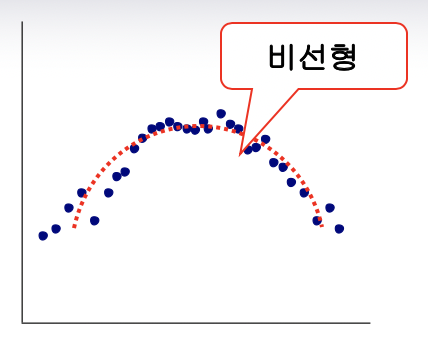

위 경우 상관관계가 있지만 상관계수는 0이 나올 것 입니다!

- 독립변수(X)의 독립성: 독립변수들이 각각 독립적이어야 합니다. 상관관계가 있는 변수들을 함께 독립변수로 사용하면 회귀분석 결과가 왜곡될 수도 있습니다.

- 변수의 정규성 : 변수들이 정규분포를 가진다는 가정이 전제되어야 합니다. 정규성을 가지지 않는 변수는 정규성을 가질 수 있도록 로그, 지수 등의 방법으로 치환해야 합니다.



## 잔차 분석

In [5]:
res = smf.ols('tip ~ total_bill', data = tips).fit()

In [13]:
#회귀분석의 예측값
res.predict(tips).head()

0    2.704636
1    2.006223
2    3.126835
3    3.407250
4    3.502822
dtype: float64

In [12]:
fitted = res.predict(tips)

#실제값에 예측값을 뺀값 즉 잔차
residual = tips['tip'] - fitted
residual.head()

0   -1.694636
1   -0.346223
2    0.373165
3   -0.097250
4    0.107178
dtype: float64

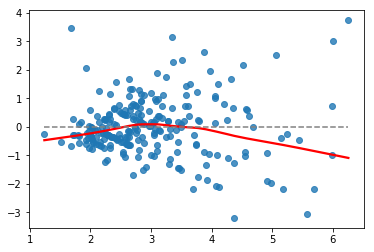

In [19]:
#lowess 파라미터는 선형 추세선을 이어서 매끄러운 곡선으로 만듭니다.
#line_kws 파라미터는 추세선의 색깔을 바꾸는 파라미터입니다.

sns.regplot(fitted,residual,lowess=True,line_kws={'color':'red'})

#아래 코드는 그래프 가운데 점선을 표시하는 그래프입니다. 
plt.plot([fitted.min(),fitted.max()],[0,0],'--',color='grey')

예측값(fitted)과 잔차(residual)을 비교하는 그래프이며 모든 예측값에서 잔차가 비슷하게 있어야 합니다. 빨간 실선은 잔차의 추세를 나타내는데, 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라지는 것을 의미합니다. 

### 잔차의 정규성

- 잔차가 정규분포를 따른다는 가정
- Q-Q 플롯으로 확인할 수 있음
- 잔차가 정규분포를 띄면 Q-Q플롯에서 점들이 점선을 따라 배치되어 있어야함

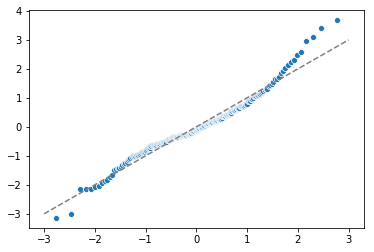

In [24]:
import scipy.stats

sr = scipy.stats.zscore(residual)
(x,y),_ = scipy.stats.probplot(sr)

sns.scatterplot(x,y)
plt.plot([-3,3],[-3,3],'--',color = 'grey')

잔차의 정규성은 샤피로 검정으로 확인할 수 있습니다. 아래 분석에서 두번째 값이 p값입니다. p값이 0.05 수준에서 잔차의 정규성 위반을 판단합니다.

In [25]:
scipy.stats.shapiro(residual)

(0.9672804474830627, 2.1714018657803535e-05)

### 잔차의 등분산성

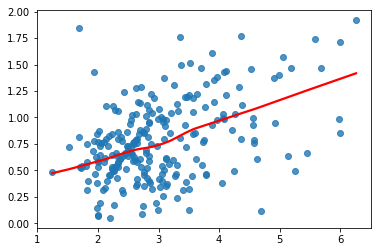

In [26]:
import numpy as np
sns.regplot(fitted,np.sqrt(np.abs(sr)),lowess = True, line_kws={'color':'red'})

- 회귀모형을 통해 예측된 값이 크던 작던 모든 값들에 대한 잔차의 분산이 동일하다는 가정
- 위 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌
- 빨간색 실선이 수평선을 그리는게 이상적